# Understanding the Central Limit Theorem

In [1]:
# Imports
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

## Central Limit Theorem (CLT)

**CLT Statement:**
* The CLT states that the distribution of the sample mean ($\bar{X}$) of $N$ i.i.d. random variables approaches a normal distribution as $N$ increases,
    - regardless of the original distribution samples are drawn from, provided it has a **finite mean and variance**, $\mu$ and $\sigma^2$
* Specifically:
    * $\bar{X} \approx N(\mu, \frac{\sigma^2}{N})$
    * Where $\mu$ is the population mean and $\sigma^2$ is the population variance.

## Experiment to empirically observe the CLT in action

Run a bunch of experiments (n_experiments), in which you should:
1. Draw N samples from a non-Gaussian distribution: 
(e.g., a uniform distribution, an exponential distribution, etc.)

2. Compute the empirical mean of the samples

3. Plot the histogram of the empirical means

4. Plot the pdf of a Gaussian distribution, with the mean and variance of the true distribution you were drawing the data from

### Set-up the true distribution 

In [2]:
# Define the true distribution
# Uniform distribution
a = 0
b = 1
true_dist = stats.uniform(
    loc=a,
    scale=b-a
)

# Exponential distribution
lambda_ = 1
true_dist = stats.expon(
    scale=1/lambda_
)

### Set-up the experiments

In [3]:
# Define the number of experiments
n_experiments = 10000

# Initialize the array of empirical means
sample_means = np.zeros(n_experiments)
# Initialize the array of empirical variances
sample_vars = np.zeros(n_experiments)

# Define the number of samples
N = 1000

# Define the number of bins for the histogram
n_bins = 50

In [4]:
# Loop over the experiments
for i in range(n_experiments):
    # Draw samples from the true distribution
    samples = true_dist.rvs(
        size=N
    )
    
    # Compute the empirical average and variance of the samples
    sample_means[i] = np.mean(samples)
    sample_vars[i] = np.var(samples)


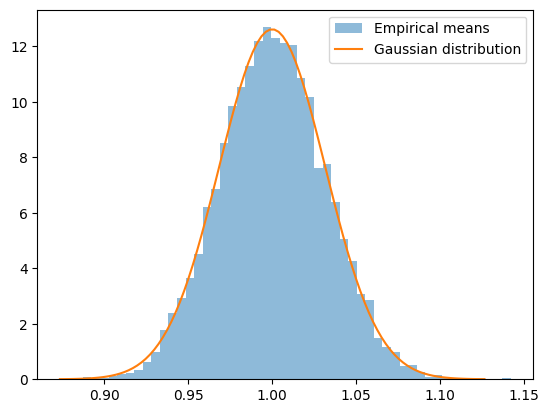

In [5]:
# Plot the histogram of the empirical means
plt.hist(
    sample_means,
    bins=n_bins,
    density=True,
    alpha=0.5,
    label='Empirical means'
)
# Plot the Gaussian distribution defined by the Central Limit Theorem
mu = true_dist.mean()
sigma = np.sqrt(true_dist.var()/N)
x = np.linspace(mu - 4*sigma, mu + 4*sigma, 100)
plt.plot(
    x,
    stats.norm.pdf(x, mu, sigma),
    label='Gaussian distribution'
)
plt.legend()
plt.show()

## Maximum Likelihood Estimation and the Central Limit Theorem (CLT)

A use-case with the Bernoulli Distribution

### Bernoulli Distribution and MLE

1.  **Bernoulli Distribution:**
    * As before, we have a Bernoulli($p$) distribution, where $p$ is the probability of success (e.g., heads).
    * We have $N$ independent and identically distributed (i.i.d.) samples: $X_1, X_2, ..., X_N$.

2.  **Likelihood Function:**
    * The likelihood function $L(p)$ represents the probability of observing our samples given a value of $p$.
    * For Bernoulli, the likelihood is:
        * $L(p) = p^{\sum X_i} (1 - p)^{N - \sum X_i}$

3.  **MLE of $p$:**
    * To find the MLE of $p$, we maximize the likelihood function (or its logarithm).
    * Taking the derivative of the log-likelihood and setting it to zero, we find:
        * $\hat{p}_{MLE} = \frac{1}{N} \sum X_i = \bar{X}$
    * This shows that the MLE of $p$ is simply the sample mean ($\bar{X}$).

### Central Limit Theorem (CLT): Application to Bernoulli estimation
* For Bernoulli($p$):
    * $\mu = p$
    * $\sigma^2 = p(1 - p)$
* Therefore, according to the CLT:
    * $\bar{X} \approx N(p, \frac{p(1 - p)}{N})$

* The CLT tells us that the distribution of $\bar{X}$ (and therefore the MLE of $p$) approaches a normal distribution as $N$ increases.
    * This means that the MLE ($\hat{p}_{MLE}$) is approximately normally distributed around the true value $p$, with a variance of $\frac{p(1 - p)}{N}$.


## Bernoulli MLE and CLT: Empirical validation

1.  **Simulation:**
    * Generate many sets of $N$ Bernoulli samples with a known $p$.
    * For each set, calculate the sample mean ($\bar{X}$), which is the MLE of $p$.
    * Plot a histogram of the calculated sample means.

2.  **Observations:**
    * As $N$ increases, the histogram will increasingly resemble a normal distribution centered around $p$.
    * The variance of the sample means will decrease as $N$ increases, illustrating the $\frac{1}{N}$ term in the CLT.
    * This demonstrates that the MLE (sample mean) is asymptotically normally distributed, a direct consequence of the CLT.

### Experiment to show Bernoulli distribution's MLE follows a normal distribution, as per the Central Limit Theorem


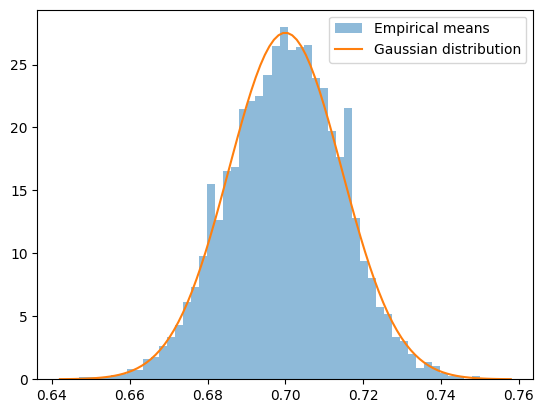

In [6]:
# Define the number of experiments
n_experiments = 10000

# Define the true distribution
p = 0.7
true_dist = stats.bernoulli(
    p=p
)

# Define the number of samples
N = 1000

# Define the number of bins for the histogram
n_bins = 50

# Set-up experiments
# Initialize the array of empirical means
sample_means = np.zeros(n_experiments)

# Loop over the experiments
for i in range(n_experiments):
    # Draw samples from the true distribution
    samples = true_dist.rvs(
        size=N
    )
    
    # Compute the empirical average of the samples
    sample_means[i] = np.mean(samples)

# Plot the histogram of the empirical means
plt.hist(
    sample_means,
    bins=n_bins,
    density=True,
    alpha=0.5,
    label='Empirical means'
)
# Plot the Gaussian distribution defined by the Central Limit Theorem
mu = true_dist.mean()
sigma = np.sqrt(true_dist.var()/N)
x = np.linspace(mu - 4*sigma, mu + 4*sigma, 100)
plt.plot(
    x,
    stats.norm.pdf(x, mu, sigma),
    label='Gaussian distribution'
)
plt.legend()
plt.show()



## Key Takeaways

* This connection is fundamental in statistical inference, as it allows us to construct confidence intervals and perform hypothesis tests based on the MLE.
* This example can be generalized to other distributions where the sample mean is the MLE of the mean parameter.